<a href="https://colab.research.google.com/github/at13lemmewrite/SMALL-PROJECTS-ON-MACHINE-LEARNING/blob/main/Salary_estimation_using_K_NEAREST_NEIGHBOUR_%5BDAYS_4_OF_30_DAYS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
uploaded=files.upload()

Saving salary.csv to salary.csv


In [5]:
dataset=pd.read_csv('salary.csv')

In [6]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [8]:
income_set=set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [10]:
x=dataset.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [11]:
y=dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [13]:
from sklearn.model_selection import train_test_split as tts
x_test, x_train, y_test, y_train= tts(x, y, test_size=0.25, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Text(0, 0.5, 'MEAN ERROR')

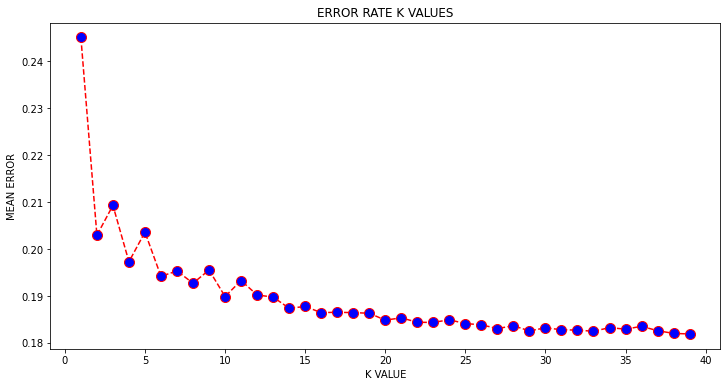

In [18]:
error=[]
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt
for i in range (1,40):
  model=KNN(n_neighbors=i)
  model.fit(x_train, y_train)
  predict_i=model.predict(x_test)
  error.append(np.mean(predict_i!=y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('ERROR RATE K VALUES')
plt.xlabel('K VALUE')
plt.ylabel('MEAN ERROR')

In [20]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model=KNN(n_neighbors=16, metric='minkowski', p=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [23]:
age=int(input('Enter age of the employee: '))
education=int(input('Enter eduaction of the employee: '))
capitalgain=int(input('Enter capital gain of the employee: '))
workinghour=int(input('Enter working hour of the employee: '))
employee=[[age, education, capitalgain, workinghour]]
result=model.predict(sc.transform(employee))
print(result)
if result==1:
  print('Employee gets above 50K salary')
else:
  print('Employee gets below or equal of 50K salary')

Enter age of the employee: 68
Enter eduaction of the employee: 9
Enter capital gain of the employee: 0
Enter working hour of the employee: 40
[0]
Employee gets below or equal of 50K salary


In [24]:
y_prediction=model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_prediction, y_test)
print('Confusion matrix:')
print(cm)
print('accuracy of the model : {0}%'.format(accuracy_score(y_test, y_prediction)*100))


Confusion matrix:
[[17654  3680]
 [  873  2213]]
accuracy of the model : 81.35544635544636%
